In [5]:
#Import Librariers
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import datetime
import os

In [6]:
#enable all graphs to show
%matplotlib inline

In [7]:
#create path
path = r'C:\Users\beatr\Documents\2024_PythonProjects\29_April_AviationData'

In [8]:
df_Aviation = pd.read_csv(os.path.join(path, '02-Data', 'database.csv'), index_col = False)

C:\Users\beatr\AppData\Local\Temp\ipykernel_9316\2084748652.py:1: DtypeWarning: Columns (9,12,15,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_Aviation = pd.read_csv(os.path.join(path, '02-Data', 'database.csv'), index_col = False)


In [10]:
df_Aviation.shape

(174104, 66)

In [11]:
df_Aviation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174104 entries, 0 to 174103
Data columns (total 66 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Record ID             174104 non-null  int64  
 1   Incident Year         174104 non-null  int64  
 2   Incident Month        174104 non-null  int64  
 3   Incident Day          174104 non-null  int64  
 4   Operator ID           174104 non-null  object 
 5   Operator              174104 non-null  object 
 6   Aircraft              174104 non-null  object 
 7   Aircraft Type         133074 non-null  object 
 8   Aircraft Make         131051 non-null  object 
 9   Aircraft Model        122439 non-null  object 
 10  Aircraft Mass         127320 non-null  float64
 11  Engine Make           123434 non-null  float64
 12  Engine Model          121988 non-null  object 
 13  Engines               127342 non-null  float64
 14  Engine Type           127282 non-null  object 
 15  

In [12]:
df = df_Aviation[['Incident Year', 'Operator', 'Aircraft', 'State', 'Species Name', 'Aircraft Damage']]

In [13]:
df.head()

,Incident Year,Operator,Aircraft,State,Species Name,Aircraft Damage
0,1990,DELTA AIR LINES,B-757-200,KY,GULL,1
1,1990,HAWAIIAN AIR,DC-9,HI,HOUSE SPARROW,0
2,1990,UNKNOWN,UNKNOWN,HI,BARN OWL,0
3,1990,MILITARY,A-10A,SC,UNKNOWN MEDIUM BIRD,0
4,1990,MILITARY,F-16,FL,FINCH,0


## 1. Clean the Data

In [15]:
# Replace NaN values with an empty string
df['Species Name'] = df['Species Name'].fillna('')

In [16]:
#remove Unknown values
df = df.loc[df['Aircraft'] != 'UNKNOWN']
df = df.loc[df['Operator'] != 'UNKNOWN']
df = df.loc[~df['Species Name'].str.contains(r'^UNKNOWN\s+\w+', regex=True)]
df.shape

(54246, 6)

In [17]:
df.head()

,Incident Year,Operator,Aircraft,State,Species Name,Aircraft Damage
0,1990,DELTA AIR LINES,B-757-200,KY,GULL,1
1,1990,HAWAIIAN AIR,DC-9,HI,HOUSE SPARROW,0
4,1990,MILITARY,F-16,FL,FINCH,0
5,1990,HAWAIIAN AIR,DC-9,HI,MUNIAS,0
10,1990,1US AIRWAYS,B-737-200,FL,GULL,0


### 1.1 Count all the values in the Dataframe

In [19]:
counts = df.value_counts()
print(counts)

Incident Year  Operator                 Aircraft    State  Species Name           Aircraft Damage
2011           HAWAIIAN AIR             B-717-200   HI     PACIFIC GOLDEN-PLOVER  0                  16
2014           HAWAIIAN AIR             B-717-200   HI     PACIFIC GOLDEN-PLOVER  0                  13
2013           JETBLUE AIRWAYS          A-320       FL     BARN SWALLOW           0                  12
1999           ALOHA AIRLINES           B-737-200   HI     PACIFIC GOLDEN-PLOVER  0                  12
2011           SKYWEST AIRLINES         CRJ100/200  CO     HORNED LARK            0                  11
                                                                                                     ..
2003           AMERICAN EAGLE AIRLINES  EMB-135     TX     BLACKBIRD              0                   1
                                                           EUROPEAN STARLING      0                   1
                                                           HAWK       

## 1.2 Firstly where looking at the different species in accidents

In [20]:
species_counts = df['Species Name'].value_counts()
print(species_counts)

GULL                        5811
MOURNING DOVE               3156
SPARROW                     2430
EUROPEAN STARLING           2403
BARN SWALLOW                2308
                            ... 
POCKETED FREE-TAILED BAT       1
JAPANESE WHITE-EYE             1
NORTHERN HAWK-OWL              1
MCKAY'S BUNTING                1
MINK                           1
Name: Species Name, Length: 639, dtype: int64


### 1.2.1 Visualise the different species in Aircraft Accidents

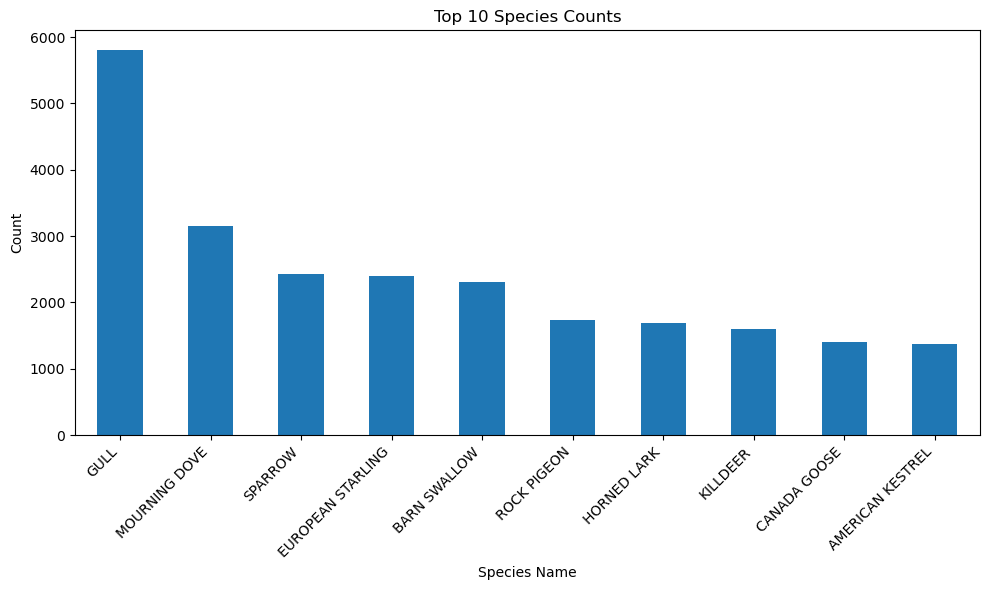

In [21]:
# Get the top 10 species counts
top_species_counts = df['Species Name'].value_counts().head(10)

# Plotting
plt.figure(figsize=(10, 6))
top_species_counts.plot(kind='bar')
plt.title('Top 10 Species Counts')
plt.xlabel('Species Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

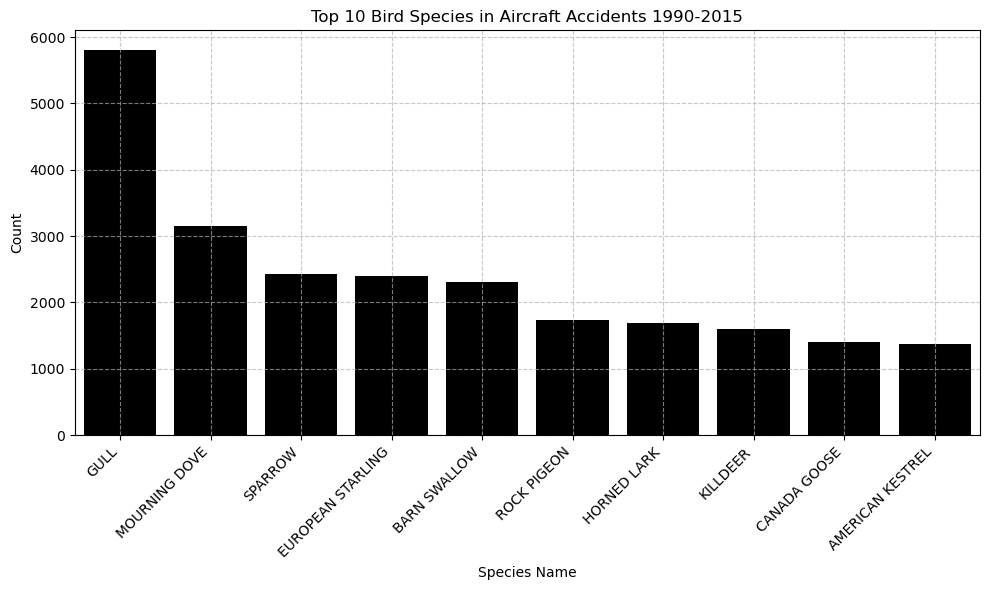

In [67]:
# Get the top 10 species counts
top_species_counts = df['Species Name'].value_counts().head(10)

# Convert the result to a DataFrame
top_species_counts = top_species_counts.reset_index()
top_species_counts.columns = ['Species Name', 'Count']

# Plotting
plt.figure(figsize=(10, 6))
Barplot = sns.barplot(x='Species Name', y='Count', data=top_species_counts, color='black')
plt.title('Top 10 Bird Species in Aircraft Accidents 1990-2015')
plt.xlabel('Species Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [68]:
#download figure
Barplot.figure.savefig(os.path.join(path, '03-Visualisations', 'Top10-BirdSpecies.png'))

## Look at the relationship between the operator and the state

In [27]:
# Replace NaN values in 'Operator' and 'State' columns with a placeholder
df['Operator'].fillna('Unknown', inplace=True)
df['State'].fillna('Unknown', inplace=True)

In [30]:
# Get the top 10 states and operators
top_states = df['State'].value_counts().head(10).index
top_operators = df['Operator'].value_counts().head(10).index

In [31]:
# Filter the DataFrame
df_filtered = df[df['State'].isin(top_states) & df['Operator'].isin(top_operators)]

In [32]:
# Create a contingency table
contingency_table = pd.crosstab(df_filtered['Operator'], df_filtered['State'])

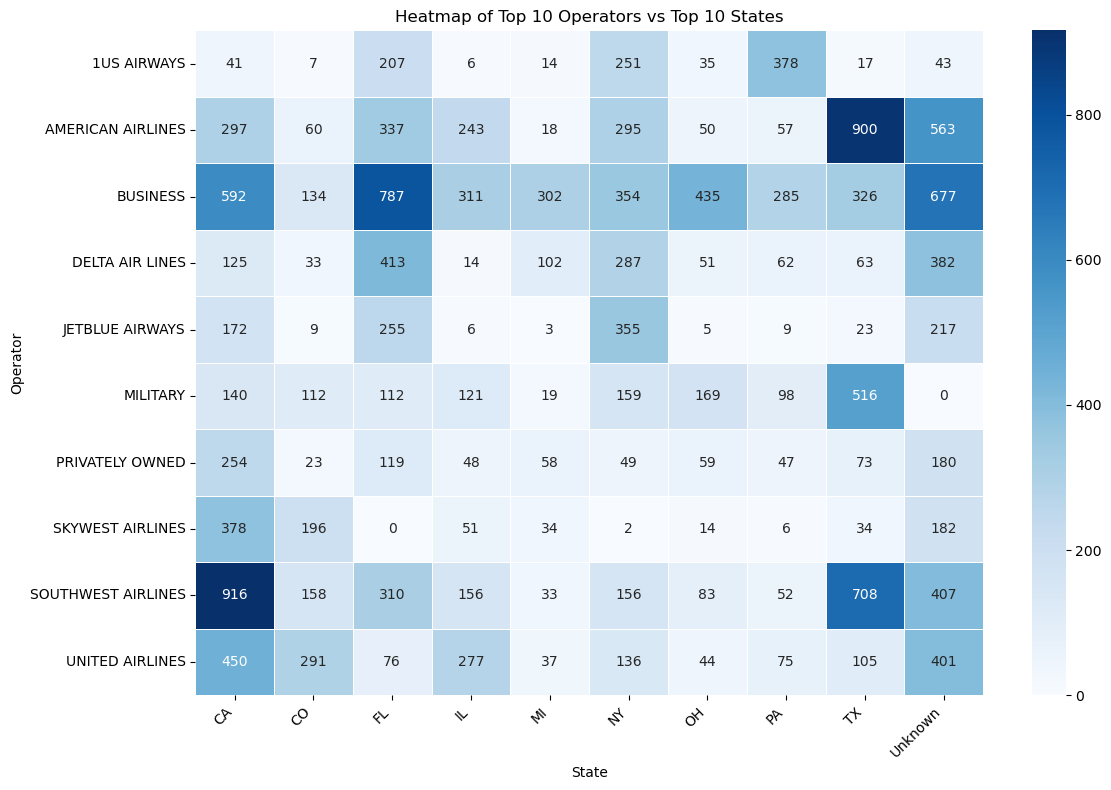

In [65]:
# Plotting the heatmap
plt.figure(figsize=(12, 8))
HeatMap = sns.heatmap(contingency_table, cmap='Blues', annot=True, fmt='d', linewidths=.5)
plt.title('Heatmap of Top 10 Operators vs Top 10 States')
plt.xlabel('State')
plt.ylabel('Operator')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [66]:
#download figure
HeatMap.figure.savefig(os.path.join(path, '03-Visualisations', 'HeatMap_Operator&State.png'))

# 3. Statistics 
## 3.1 Catogorical relationships


In [34]:
# import chi-square test
from scipy.stats import chi2_contingency

In [36]:
# Perform chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("P-value:", p)

Chi-square statistic: 9586.2639247882
P-value: 0.0


- The chi-square statistic and the p-value obtained suggest that there is a statistically significant 
association between the 'Operator' and 'State' variables.

- The chi-square statistic (9586.26) is a measure of the strength of the association between the variables.

- The p-value (0.0) is the probability of observing such extreme results if the variables were independent.

- With such a low p-value (close to zero), we typically reject the null hypothesis that the variables are independent.

- This implies that there is a significant relationship between the 'Operator' and 'State' variables in the context of the incidents data.

- This result indicates that the choice of operator and the state where incidents occur are not independent; they are associated with each other in a statistically significant manner.

In [37]:
# Replace NaN values in 'Species Name' column with a placeholder
df['Species Name'].fillna('Unknown', inplace=True)

In [40]:
from scipy.stats import kruskal

In [38]:
# Group 'Incident Year' by 'Species Name'
groups = []
for species, data in df.groupby('Species Name')['Incident Year']:
    groups.append(data.values)

In [41]:
# Perform Kruskal-Wallis test
statistic, p_value = kruskal(*groups)

print("Kruskal-Wallis statistic:", statistic)
print("P-value:", p_value)

Kruskal-Wallis statistic: 15087.4898745659
P-value: 0.0


- The Kruskal-Wallis statistic and the obtained p-value suggest that there is a 
 statistically significant relationship between the year of the accident ('Incident Year') 
 and the species of the bird ('Species Name').

- The Kruskal-Wallis statistic (15087.49) is a measure of the strength of the relationship between the two variables.

- The p-value (0.0) indicates the probability of observing such extreme results if the variables were not related.
With such a low p-value (close to zero), we typically reject the null hypothesis 
that the distributions of 'Incident Year' across different species are the same. 
This suggests that there is a significant relationship between the year of the accident and the species of the bird.

- In practical terms, this result indicates that the distribution of accident years varies significantly 
across different bird species, implying that certain species might be involved in incidents more frequently 
in certain years compared to others.

# 4 Visualizations
## 4.1 Boxplots & Violin plot

In [42]:
# Get the top 10 species
top_species = df['Species Name'].value_counts().head(10).index

In [43]:
# Filter the DataFrame to include only the top 10 species
df_top_species = df[df['Species Name'].isin(top_species)]

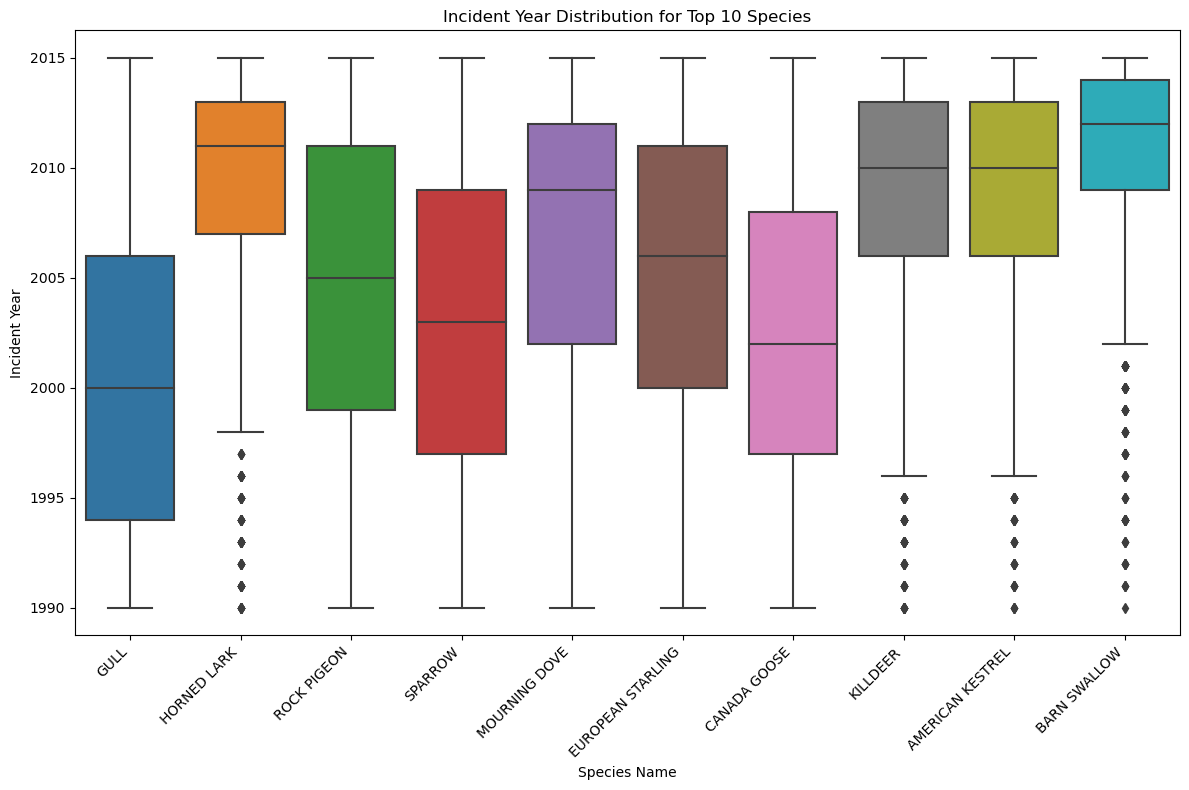

In [63]:
# Plotting
plt.figure(figsize=(12, 8))
SpeciesBox = sns.boxplot(x='Species Name', y='Incident Year', data=df_top_species)
plt.title('Incident Year Distribution for Top 10 Species')
plt.xlabel('Species Name')
plt.ylabel('Incident Year')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [64]:
#download figure
SpeciesBox.figure.savefig(os.path.join(path, '03-Visualisations', 'SpeciesBox.png'))

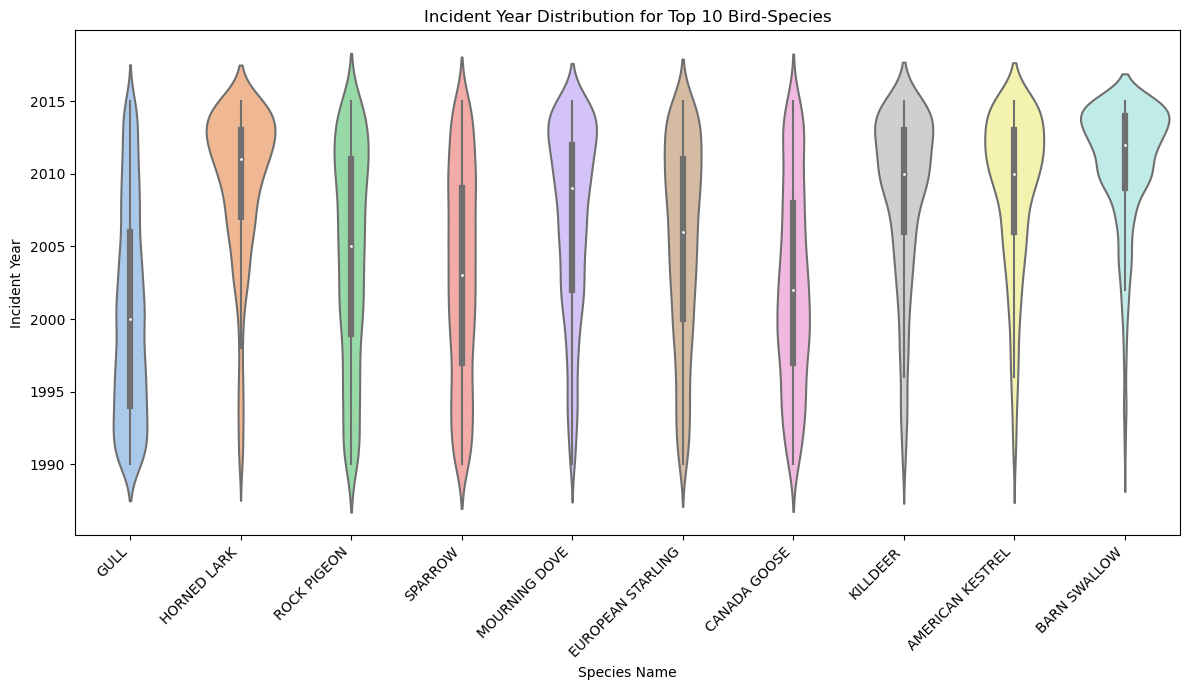

In [60]:
# Define a color palette for the plot
colors = sns.color_palette("pastel")

# Plotting
plt.figure(figsize=(12, 7))
Species_Violin = sns.violinplot(x='Species Name', y='Incident Year', data=df_top_species, palette=colors)
plt.title('Incident Year Distribution for Top 10 Bird-Species')
plt.xlabel('Species Name')
plt.ylabel('Incident Year')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show(Species_Violin)

In [62]:
#download figure
Species_Violin.figure.savefig(os.path.join(path, '03-Visualisations', 'violin.png'))